<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Binary_classification_of_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score , ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# **[Assignment 1] Select features and categories for practice**
There are a total of 18 ways to choose, but we will practice with the following combinations. After getting the iris dataset in the same way as Week3, extract these from the data frame.
*   virgicolorとvirginica
*   sepal_lengthとpetal_length

《What is the actual problem? 》

Visualization of results is also effective in solving actual problems. However, it is not desirable to limit the number of features used for learning and estimation to just two. Therefore, learning and estimation are multidimensional, and feature extraction methods such as principal component analysis are applied only when visualizing. It is also possible to visualize using the scatterplot matrix used in Week3.



In [ ]:
data = load_iris()
X = pd.DataFrame(data = data.data, columns = data.feature_names)
y = pd.DataFrame(data = data.target, columns = ['species'])
features = ['sepal length (cm)', 'petal length (cm)', 'species']
data = pd.concat([X,y], axis=1)

data = data.loc[:, features]
data = data.iloc[50:,:]

# **[Question 2] Data analysis**
First, we will analyze the data, which we did in Task 1 of Week 3. By looking at the scatterplot matrix that was output at that time, you can also check the scatterplots for each of the 18 patterns mentioned earlier. You'll find that using sepal_length and petal_length to classify virgicolor and virginica is a bit of a tricky situation.

Here, as a review, please display the scatterplot, boxplot, and violinplot of the extracted data.

《What is the actual problem? 》

Based on the results of this data analysis, we perform feature quantity engineering as preprocessing.

I extracted sepal_length and petal_length this time, but after analyzing it, I can say that I preprocessed it to make the problem a little more difficult.

    sepal length (cm)  petal length (cm)  species
50                7.0                4.7        1
51                6.4                4.5        1
52                6.9                4.9        1
53                5.5                4.0        1
54                6.5                4.6        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 50 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   petal length (cm)  100 non-null    float64
 2   species            100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
       sepal length (cm)  petal length (cm)     species
count         100.000000         100.000000  100.000000
mean            6.262000           4.906000    1.500000
std             0.662834           0.825578    0.502519
min             4.900000           3.000000    1.000000
25%             5.80

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


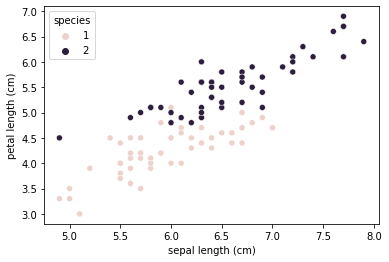

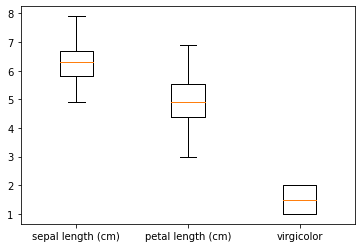

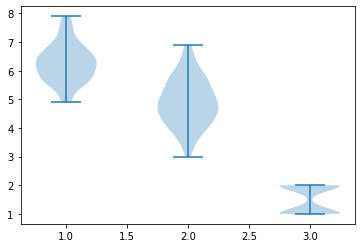

In [ ]:
print(data.head(5))
print(data.info())
print(data.describe())

sns.scatterplot(data['sepal length (cm)'],data['petal length (cm)'],hue=data['species'])
plt.show

fig, ax = plt.subplots()
labels = ['sepal length (cm)','petal length (cm)','virgicolor']
ax.boxplot((data.iloc[:,0],data.iloc[:,1],data.iloc[:,2]),labels=labels)
plt.show()

fig,ax = plt.subplots()
ax.violinplot((data.iloc[:,0],data.iloc[:,1],data.loc[:,'species']))
plt.show()

# **[Problem 3] Division of preprocessing/training data and validation data**
As part of the preprocessing, we split the training and validation data. This time split the data as 75% training data and 25% validation data.

scikit-learn train_test_splitis available. Please refer to the examples in the official document.

"important point"

Until the analysis of the data, we have been using Pandas DataFrame. However, scikit-learn is built with NumPy ndarrays in mind. So let's do the conversion to ndarray at this stage. Store the feature value (explanatory variable) in X and the correct answer (objective variable) in ndarray named y.

<Reason for division>

The goal of a classification problem is to correctly classify unknown data. In order to check whether the purpose has been achieved, a part of the data for which the answer is actually known is left without being used for learning. Estimates are made with data not used for this learning, and the index values ​​obtained from them are verified. The data used for learning is the training data, and the data used for verification is the validation data. Generally, the ratio is about 7:3 to 8:2.


In [ ]:
X = data.loc[:, ['sepal length (cm)', 'petal length (cm)']].to_numpy()
y = data.loc[:, 'species'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=123)

print('train feature shape: {}'.format(X_train.shape))
print('test feature shape: {}'.format(X_test.shape))
print('train label shape: {}'.format(y_train.shape))
print('train label shape: {}'.format(y_test.shape))

train feature shape: (75, 2)
test feature shape: (25, 2)
train label shape: (75,)
train label shape: (25,)


# **[Problem 4] Preprocessing and standardization**

Processing is performed to increase the classification accuracy. The appropriate method differs for each technique, but here we will use standardization as an example.

A standardization library is also available in scikit-learn. Use this to standardize.

"important point"

Standardization is fitdone on the training data and on both the training and validation data transform. Validation data represent unknown data that did not exist in the training phase, so they should not be used to calculate mean or standard deviation for standardization. Also, since this is a classification problem, there is no need to standardize the labels.

《What is the pretreatment in the actual problem? 》

It is rare to be provided in a clean and easy-to-use situation like the iris dataset. While performing analysis, various processing becomes necessary. For example, after confirming missing values ​​in Task 2 of Week 3, imputation of missing values ​​may be performed. Check for outliers, clean multiple datasets, and more.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **[Question  5] Learning and Estimation**
It learns by the nearest neighbors method (k-nearest neighbors, k-nn). Learn k-nn by referring to Examples in the scikit-learn official document. Input here is the training data.

After the training is finished, predictinput the validation data into the method and perform the estimation.

There are multiple parameters, but I don't care about understanding them right now. As the most basic element, n_neighborsthere is a number of , so let's try this multiple. Do the default 5, and 1 and 3 as a minimum. Call the 5 case 5-nn, the 3 case, and so on.3-nn

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred3 = neigh.predict(X_test)

neigh5 = KNeighborsClassifier(n_neighbors=3)
neigh5.fit(X_train, y_train)
y_pred5 = neigh5.predict(X_test)

# **[Question  6] Evaluation**
Calculate the closeness between the estimated value obtained by inputting the feature value of the validation data and the correct value of the validation data, and evaluate the trained model.

Index values ​​for evaluating binary classification include Accuracy (correct answer rate) , Precision (precision rate) , Recall (recall rate) and F value. To understand what each means, you have to look at the confusion matrix.

*   Calculate 4 types of indicators using scikit-learn
*   Display confusion matrix using scikit-learn
*   Briefly investigate the meaning of the four types of index values ​​and summarize them in sentences



**Accuracy_score**

In [ ]:
accs = pd.DataFrame(columns= ['Classifier', 'Accuracy'])

acc3 = accuracy_score(y_test, y_pred3)
acc5 = accuracy_score(y_test, y_pred5)
print('k_neigh = 3: accurcy = {}'.format(acc3))
print('k_neigh = 5: accurcy = {}'.format(acc5))

k_neigh = 3: accurcy = 0.96
k_neigh = 5: accurcy = 0.96


**precision_score**

In [ ]:
p_score3 = precision_score(y_test, y_pred3,average='micro')
p_score5 = precision_score(y_test, y_pred5,average='micro')
print('k_neigh = 3: accurcy = {}'.format(p_score3))
print('k_neigh = 5: accurcy = {}'.format(p_score5))

k_neigh = 3: accurcy = 0.96
k_neigh = 5: accurcy = 0.96


**recall_score**

In [ ]:
r_score3 = precision_score(y_test, y_pred3,average='micro')
r_score5 = precision_score(y_test, y_pred5,average='micro')
print('k_neigh = 3: accurcy = {}'.format(r_score3))
print('k_neigh = 5: accurcy = {}'.format(r_score5))

k_neigh = 3: accurcy = 0.96
k_neigh = 5: accurcy = 0.96


**f1_score**

In [ ]:
f1_score3 = precision_score(y_test, y_pred3,average='micro')
f1_score5 = precision_score(y_test, y_pred5,average='micro')
print('k_neigh = 3: accurcy = {}'.format(f1_score3))
print('k_neigh = 5: accurcy = {}'.format(f1_score5))

k_neigh = 3: accurcy = 0.96
k_neigh = 5: accurcy = 0.96


**confusion matrix**

[[13  0]
 [ 1 11]]


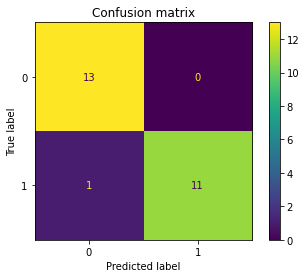

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred3)
print(conf_mat)

cm_display = ConfusionMatrixDisplay(conf_mat).plot()
plt.title('Confusion matrix')
plt.show()

accs = accs.append({'Classifier': 'KNN', 'Accuracy': acc3, 'f1 score': f1_score3}, ignore_index=True)

# **[Question  7] Visualization**
Visualization is performed as part of the evaluation. In this case, we used 2D feature values ​​for classification, so we can visualize it with a scatter plot. Below is a function that draws a decision area on how to divide. Please use this for visualization. For X and y, give training or validation data.

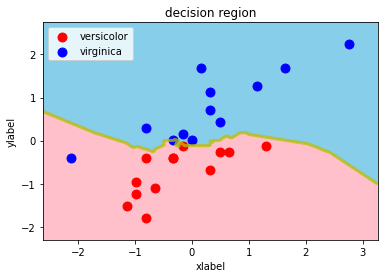

In [ ]:
decision_region(X_test, y_test, neigh)

##**Comparison of each method**

# **[Question  8] Learning other methods**
Please learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Briefly discuss the results using the table and decision area. Please state which method was good at which indicator value and what decision area was.

*   Nearest method
*   logistic regression
*   SVM
*   decision tree
*   random forest

The link to the official documentation is below. Each has its own parameters (hyperparameters) to adjust, which are beyond the scope of this exercise. Run with the default values ​​first.




In [ ]:
#LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
f1score = f1_score(y_test, lr_pred)
accs = accs.append({'Classifier': 'Logistic regression', 'Accuracy': lr_acc, 'f1 score': f1score}, ignore_index=True)

#SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
f1score = f1_score(y_test, svc_pred)
accs = accs.append({'Classifier': 'SVC', 'Accuracy': svc_acc, 'f1 score': f1score}, ignore_index=True)

#DecisionTree
dt = DecisionTreeClassifier(max_depth = 3, random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
f1score = f1_score(y_test, dt_pred)
accs = accs.append({'Classifier': 'Decision Tree', 'Accuracy': dt_acc, 'f1 score': f1score}, ignore_index=True)

#RandomForest
forest = RandomForestClassifier(random_state=123)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)
f1score = f1_score(y_test, forest_pred)
accs = accs.append({'Classifier': 'Random forest ', 'Accuracy': forest_acc, 'f1 score': f1score}, ignore_index=True)

print(accs)

            Classifier  Accuracy  f1 score
0                  KNN      0.96  0.960000
1  Logistic regression      0.96  0.962963
2                  SVC      0.96  0.962963
3        Decision Tree      0.96  0.962963
4       Random forest       0.96  0.962963
